## Mean-Shift

<p style='direction:rtl; text-align: right'>
در اینجا، پیکسل‌ها را در فضای RGB در نظر می‌گیریم و روش Mean-Shift را روی آن اجرا می‌کنیم. در نهایت کلاستر سنتر ها را به جای
هر پیکسل در تصویر اصلی قرار می‌دهیم.
از آنجایی که روش Mean-Shift بسیار پر هزینه است، تصویر را down-sample میکنیم زیرا در صورتی که اینکار با اعمال فیلتر گاوسی همراه کنیم،
همانند تنک کردن رندوم نقاط در فضای RGB خواهد بود.
همچنین bandwidth را با چند نمونه‌گیری تصادفی از مجموعه داده‌ها تخمین میزنیم؛ به صورتی که از بین تمام فاصله‌های دو به دوی
نقاط در نمونه، ضریبی از چارک اول را انتخاب میکنیم.
</p>


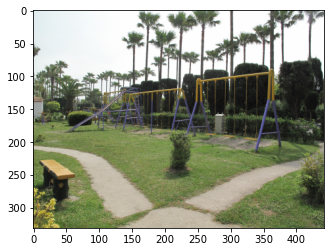

In [1]:
from sklearn import cluster
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

img = plt.imread('./data/park.jpg')
r_img = cv.resize(img, (0, 0), img, 0.1, 0.1, cv.INTER_AREA)
plt.imshow(r_img)
plt.show()

In [2]:
def clustering(feat_src, dist_coef = 0.1, bandwidth_coef = 0.23, with_xy = False, plot_dists=True):
    feat_src = cv.GaussianBlur(feat_src, (71, 71), 0)

    if with_xy:
        coord_table = np.dstack(np.mgrid[:feat_src.shape[0], :feat_src.shape[1]]) * dist_coef
        feat_src = np.concatenate((feat_src, coord_table), axis=2)

    r_feat = feat_src[::50, ::50]

    feat_src = feat_src.reshape((feat_src.shape[0] * feat_src.shape[1], feat_src.shape[2]))
    r_feat = r_feat.reshape((r_feat.shape[0] * r_feat.shape[1], r_feat.shape[2]))

    bandwidth = cluster.estimate_bandwidth(feat_src, quantile=0.3, n_samples=3000, n_jobs=-1)

    ms = cluster.MeanShift(bandwidth=bandwidth * bandwidth_coef, n_jobs=-1, max_iter=100, bin_seeding=True)
    ms = ms.fit(r_feat)

    if plot_dists:
        plt.scatter(r_feat[:, 0], r_feat[:, 1], s=0.01, c=ms.labels_)
        plt.show()
        plt.scatter(r_feat[:, 0], r_feat[:, 2], s=0.01, c=ms.labels_)
        plt.show()
        plt.scatter(r_feat[:, 1], r_feat[:, 2], s=0.01, c=ms.labels_)
        plt.show()

    res = ms.cluster_centers_[ms.predict(feat_src)][:, :3]
    res = np.reshape(res, img.shape).astype(np.uint8)
    return res

<p style='direction:rtl; text-align: right'>
در ادامه در فضای رنگی‌های متفاوت، این خوشه‌بندی را انجام می‌دهیم.
همچنین می‌توان مختصات نقاط را نیز به عنوان یکی از فیچر‌ها در نظر گرفت و خوشه‌بندی انجام داد.
</p>


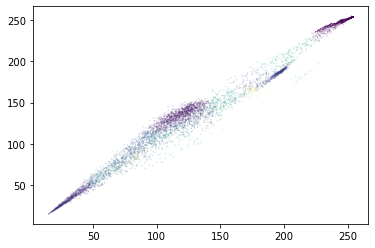

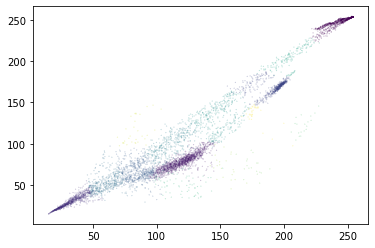

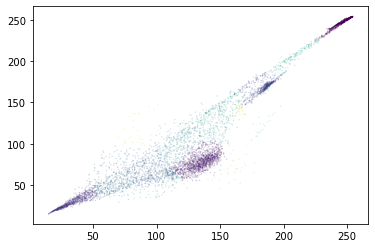

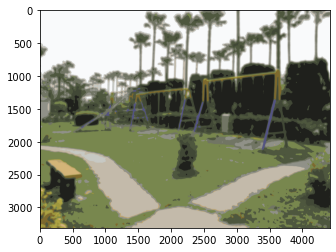

In [3]:
# RGB
src = img.copy().astype(float)
res = clustering(src)

plt.imshow(res)
plt.show()

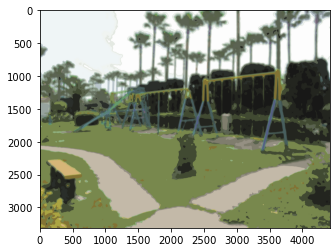

In [4]:
# HSV
src = cv.cvtColor(img, cv.COLOR_RGB2HSV_FULL).astype(float)
res = clustering(src, bandwidth_coef = 0.23, plot_dists=False)

plt.imshow(cv.cvtColor(res, cv.COLOR_HSV2RGB_FULL))
plt.show()

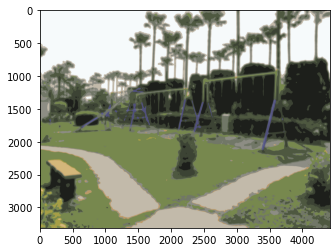

In [5]:
# Lab
src = cv.cvtColor(img, cv.COLOR_RGB2Lab).astype(float)
res = clustering(src, dist_coef = 0.1, bandwidth_coef = 0.23, plot_dists=False)

plt.imshow(cv.cvtColor(res, cv.COLOR_Lab2RGB))
plt.show()

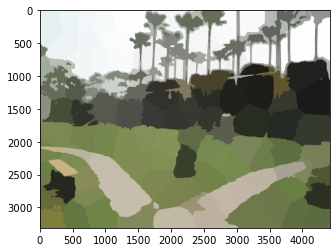

In [12]:
# RGBxy
src = img.copy().astype(float)
res = clustering(src, bandwidth_coef=0.15, dist_coef=0.4, plot_dists=False, with_xy=True)

plt.imshow(res)
plt.show()

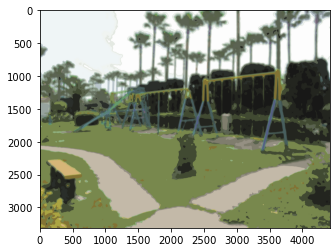

In [10]:
# HSVxy
src = cv.cvtColor(img, cv.COLOR_RGB2HSV_FULL).astype(float)
res = clustering(src, dist_coef=0.3, bandwidth_coef = 0.2, plot_dists=False)

plt.imshow(cv.cvtColor(res, cv.COLOR_HSV2RGB_FULL))
plt.show()

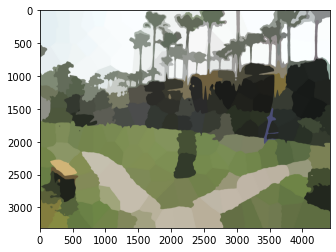

In [13]:
# Labxy
src = cv.cvtColor(img, cv.COLOR_RGB2Lab).astype(float)
res = clustering(src, dist_coef = 0.3, bandwidth_coef = 0.12, plot_dists=False, with_xy=True)

plt.imshow(cv.cvtColor(res, cv.COLOR_Lab2RGB))
plt.show()

